In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style
style.use("ggplot")

In [2]:
train_data=pd.read_csv("C:\\Users\\sarth\\Downloads\\train.csv")
test_data=pd.read_csv("C:\\Users\\sarth\\Downloads\\test.csv")

In [3]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
np.prod(train_data.shape)

10692

In [7]:
train_data.shape

(891, 12)

In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_data.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
train_data.Cabin.nunique()

147

In [11]:
train_data.Cabin.notnull().sum()

204

In [12]:
train_data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
age_null=train_data.loc[train_data.Age.isnull()]
age_null.groupby('Survived').PassengerId.count()

Survived
0    125
1     52
Name: PassengerId, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='Density'>

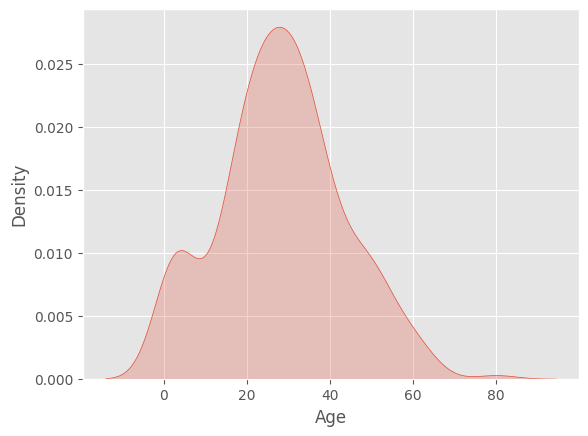

In [14]:
age_not_null_sur=train_data.loc[train_data.Age.notnull()].apply(lambda p:p.loc[train_data.Survived==1])
sns.kdeplot(x=age_not_null_sur.Age,fill=True)

<AxesSubplot: xlabel='Age', ylabel='Density'>

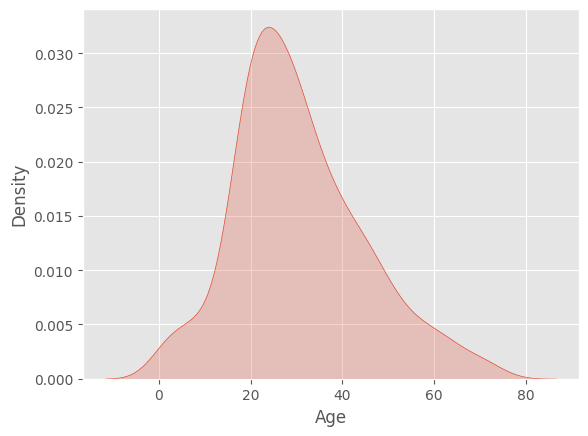

In [15]:
age_not_null_nsur=train_data.loc[train_data.Age.notnull()].apply( lambda p:p.loc[train_data.Survived==0])
sns.kdeplot(x=age_not_null_nsur.Age,fill=True)

In [16]:
train_data.loc[train_data.Embarked.isnull()].Survived

61     1
829    1
Name: Survived, dtype: int64

In [17]:
train_data.groupby('Sex').PassengerId.count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [18]:
print('Male survival ratio : ',train_data.loc[train_data.Sex=='male'].Survived.sum()/577)
print('Female survival ratio : ',train_data.loc[train_data.Sex=='female'].Survived.sum()/314)

Male survival ratio :  0.18890814558058924
Female survival ratio :  0.7420382165605095


In [19]:
train_data.loc[train_data.Survived==1].Embarked.unique()

array(['C', 'S', 'Q', nan], dtype=object)

In [20]:
train_data.groupby('Embarked').PassengerId.count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

In [23]:
print(train_data.loc[train_data.Embarked=='C'].Survived.sum()/168)
print(train_data.loc[train_data.Embarked=='Q'].Survived.sum()/77)
print(train_data.loc[train_data.Embarked=='S'].Survived.sum()/644)

0.5535714285714286
0.38961038961038963
0.33695652173913043


C:\Users\sarth\AppData\Local\Temp\ipykernel_6304\454206412.py:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  emb=train_data.groupby('Embarked').apply(lambda train_data:train_data.loc[train_data.Survived==1].sum()).select_dtypes(include=['int64'])


<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

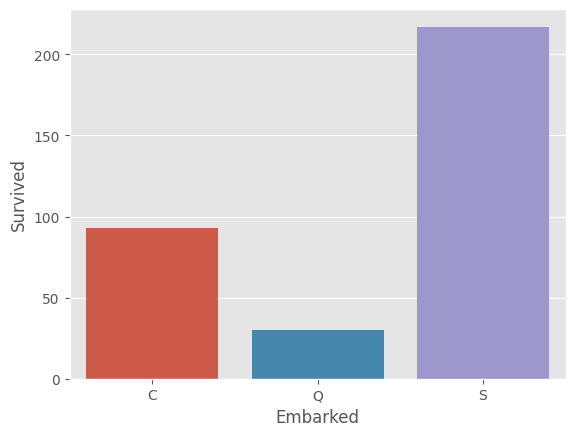

In [24]:
emb=train_data.groupby('Embarked').apply(lambda train_data:train_data.loc[train_data.Survived==1].sum()).select_dtypes(include=['int64'])
sns.barplot(x=emb.index,y=emb.Survived)

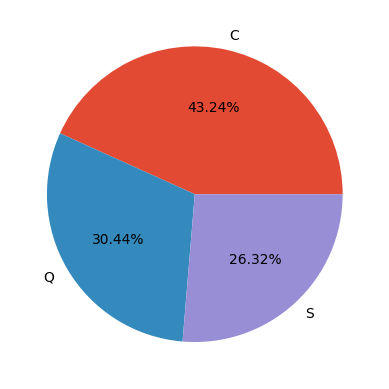

In [25]:
emb['survived percentage']=emb.Survived.tolist()/train_data.groupby('Embarked').PassengerId.count()
plt.pie(x=emb['survived percentage'],labels=emb.index,autopct='%1.2f%%')
plt.ticklabel_format(axis='x',style='plain')

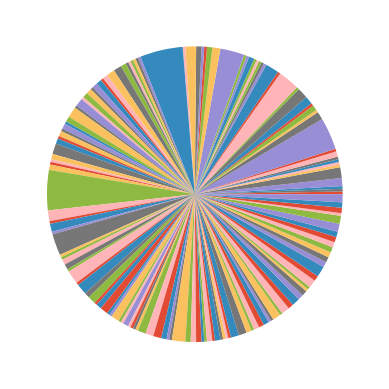

In [26]:
plt.pie(train_data.groupby('Fare').Survived.sum())#,autopct='%1.0f%%')#.sort_values(ascending=False)
plt.ticklabel_format(style='plain')

In [27]:
print(train_data.groupby('Pclass').Survived.count())
print(train_data.groupby('Pclass').Survived.sum())

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


In [28]:
Pclass=train_data.groupby('Pclass').Survived.sum()/train_data.groupby('Pclass').Survived.count()
Pclass=pd.DataFrame(Pclass)
Pclass

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


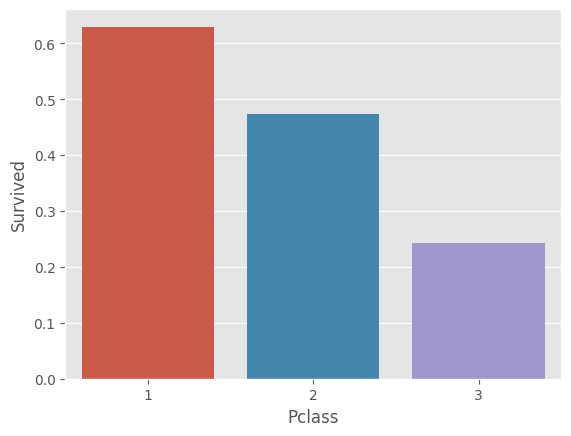

In [29]:
sns.barplot(x=Pclass.index,y=Pclass.Survived)
plt.ticklabel_format(axis='y',style='plain')

In [30]:
train_data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [31]:
print(train_data.groupby('Parch').Survived.sum())
print(train_data.groupby('Parch').Survived.count())
Parch=pd.DataFrame(train_data.groupby('Parch').Survived.sum()/train_data.groupby('Parch').Survived.count())
Parch

Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Survived, dtype: int64


,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


<AxesSubplot: xlabel='Parch', ylabel='Survived'>

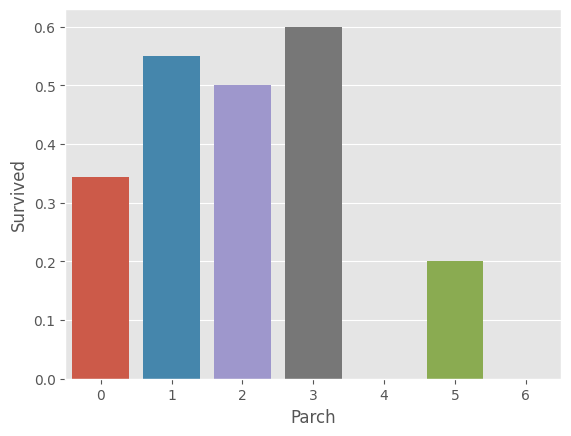

In [32]:
sns.barplot(x=Parch.index,y=Parch.Survived)

In [33]:
print(train_data.groupby('SibSp').Survived.sum())
print(train_data.groupby('SibSp').Survived.count())

SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: Survived, dtype: int64


In [34]:
SibSp=train_data.groupby('SibSp').Survived.sum()/train_data.groupby('SibSp').Survived.count()
SibSp=pd.DataFrame(SibSp)
SibSp

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


<AxesSubplot: xlabel='SibSp', ylabel='Survived'>

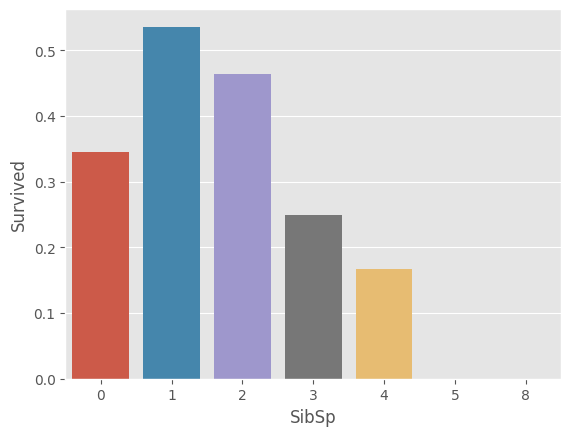

In [35]:
sns.barplot(x=SibSp.index,y=SibSp.Survived)

In [36]:
train_data['Parch_SibSp_sum']=train_data['Parch']+train_data['SibSp']
train_data['Parch_SibSp_sum'].unique()
family_members=(train_data.groupby(['Parch_SibSp_sum']).Survived.sum()/train_data.groupby(['Parch_SibSp_sum']).Survived.count()*100)

<AxesSubplot: xlabel='Parch_SibSp_sum'>

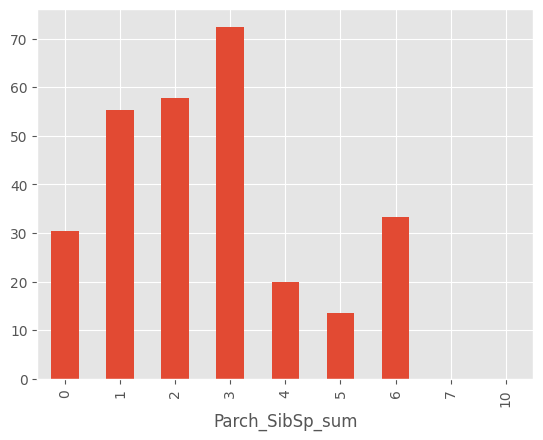

In [37]:
family_members.plot.bar()

In [38]:
train_data.Ticket.nunique()

681

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [40]:
numerical_cols=train_data.select_dtypes(exclude='object')

In [41]:
numerical_cols.drop(['Survived','PassengerId', 'SibSp', 'Parch', 'Fare'],axis=1,inplace=True)

In [42]:
numerical_cols=numerical_cols.columns.to_list()
numerical_cols

['Pclass', 'Age', 'Parch_SibSp_sum']

In [43]:
categorical_cols=train_data.select_dtypes(exclude=['int64','float64'])

In [44]:
categorical_cols.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)

In [45]:
categorical_cols=categorical_cols.columns.to_list()
categorical_cols

['Sex', 'Embarked']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
y=train_data.Survived

In [48]:
my_cols=categorical_cols+numerical_cols
my_cols

['Sex', 'Embarked', 'Pclass', 'Age', 'Parch_SibSp_sum']

In [49]:
X=train_data[my_cols]

In [50]:
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
numerical_transformer=SimpleImputer(strategy='median')
categorical_transformer=Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='S')),
                                        ('onehot',OneHotEncoder(handle_unknown='ignore'))])
scaler=MinMaxScaler()

In [103]:
Preprocessor=ColumnTransformer(transformers=[('num',numerical_transformer,numerical_cols),                                     
                                             ('cat',categorical_transformer,categorical_cols)])

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [76]:
lr=LogisticRegression()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
KNC=KNeighborsClassifier()
svc=SVC()
lis=[lr,rfc,xgb,KNC]

In [86]:
score={}
for i in lis:
    pipeline=Pipeline(steps=[('preprocessor',Preprocessor),
                        ('model',i)])
    pipeline.fit(X_train,y_train)
    s=pipeline.score(X_val,y_val)
    score[i]=s

In [87]:
score

{LogisticRegression(): 0.8100558659217877,
 RandomForestClassifier(): 0.8100558659217877,
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...): 0.8324022346368715,
 KNeighborsClassifier(): 0.7821229050279329}

In [108]:
my_model=XGBClassifier()
my_pipeline=Pipeline(steps=[('preprocessor',Preprocessor),
                    ('scaling',scaler),
                    ('model',my_model)])
my_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Pclass', 'Age',
                                                   'Parch_SibSp_sum']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='S',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked'])])),
                ('scaling', MinMaxScaler()),
                ('model',
                 XGBClassifier(b...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [109]:
my_pipeline.predict(X_val)

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [110]:
my_pipeline.score(X_val,y_val)

0.8324022346368715

In [111]:
my_pipeline.score(X_train,y_train)

0.9171348314606742

In [112]:
preds=my_pipeline.predict(X_val)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(preds,y_val)

0.16759776536312848

In [60]:
test_data['Parch_SibSp_sum']=test_data['Parch']+test_data['SibSp']
X_test_val=test_data[my_cols]
predictions=my_pipeline.predict(X_test_val).tolist()

In [61]:
submissions=pd.DataFrame({'PassengerId':test_data.PassengerId.tolist(),'Survived':predictions})

In [62]:
submissions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [63]:
submissions.to_csv("submission.csv",index=False)